### This jupyter notebook is to understand the produciton-loss vs tilt-change from the data from PV-Watts

In [47]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Annual Production vs Tilt')

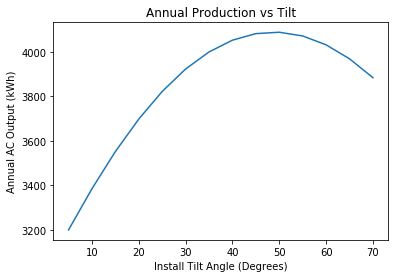

In [48]:
# API calls to NREL(This part is from the file "Exploring API Calls to NREL" by Jon)
nrel_long_tilt = []
tilts = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
for i in range(len(tilts)):
    list_parameters = {"format": 'JSON', "api_key": "DEMO_KEY", "system_capacity": 4, "module_type": 0, "losses": 14.08,
              "array_type": 0, "tilt": tilts[i], "azimuth": 180, "lat": 64.82, "lon": -147.87, "dataset": 'tmy2'}
    json_response = requests.get("https://developer.nrel.gov/api/pvwatts/v6", params = list_parameters).json()
    new_dataframe = pd.DataFrame(data = json_response['outputs'])
    nrel_long_tilt.append(new_dataframe)
#print(nrel_long_tilt)

annual_production = []
for i in range(len(tilts)):
    annual_production.append(nrel_long_tilt[i]['ac_annual'][2])
#print(annual_production)

plt.plot(tilts, annual_production)
plt.xlabel("Install Tilt Angle (Degrees)")
plt.ylabel("Annual AC Output (kWh)")
plt.title("Annual Production vs Tilt")

In [43]:
#Ok, then calculate the loss right now.
#First,get the max annual_production's tilt.
#We create a dataframe
d = {'Tilts':tilts,'Annual_production':annual_production}
df = pd.DataFrame(d)

#Then find out the max production raw
max_tilt = df[['Annual_production']].idxmax().values

#Then calculate the other tilts' lose compared with the max annual production
lose = []
for index, row in df.iterrows():
    tilt_loss = (1-row['Annual_production']/df['Annual_production'][name[0]])
    loss_percentage = "{0:.2%}".format(tilt_loss)
    lose.append(loss_percentage)
#OK, then put back to the dataframe
df['loss']=lose

9

In [25]:
# See if there is a good dataframe.
df
#Ok, the result shows pretty good.

,Tilts,Annual_production,loss
0,5,3200.612793,21.70%
1,10,3385.348389,17.18%
2,15,3552.159912,13.10%
3,20,3697.927734,9.53%
4,25,3821.869385,6.50%
5,30,3922.596924,4.04%
6,35,3999.150146,2.16%
7,40,4051.975342,0.87%
8,45,4081.388428,0.15%
9,50,4087.587646,0.00%


In [46]:
#SO,Let's make it a function
def loss_tilt(tilts,annual_production):
    """The function is to create a dataframe that contain the loss of the tilt
    
    Args:
         tilts(list): The list of tilts used before to get the Prediction
         annual_production(list):The list of the Prediction
         ***need to make sure that the length of two lists should be the same***
         
    Returns: A dataframe
    
    """
    d = {'Tilts':tilts,'Annual_production':annual_production}# Create a dictionary containg the two list
    df = pd.DataFrame(d)# create a dataframe
    
    max_tilt = df[['Annual_production']].idxmax().values#get the index of the max Annual production
    
    lose = [] # an empty list
    for index, row in df.iterrows(): # Calculate the loss of adjusting the tilt 
        tilt_loss = (1-row['Annual_production']/df['Annual_production'][name[0]])
        loss_percentage = "{0:.2%}".format(tilt_loss)
        lose.append(loss_percentage)
        
    df['loss']=lose # put into the dataframe
    return(df)

In [49]:
loss_tilt(tilts,annual_production)

,Tilts,Annual_production,loss
0,5,3200.612793,21.70%
1,10,3385.348389,17.18%
2,15,3552.159912,13.10%
3,20,3697.927734,9.53%
4,25,3821.869385,6.50%
5,30,3922.596924,4.04%
6,35,3999.150146,2.16%
7,40,4051.975342,0.87%
8,45,4081.388428,0.15%
9,50,4087.587646,0.00%
